# HW 1

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [161]:
diamonds_df = pd.read_csv('diamonds.csv')

In [162]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


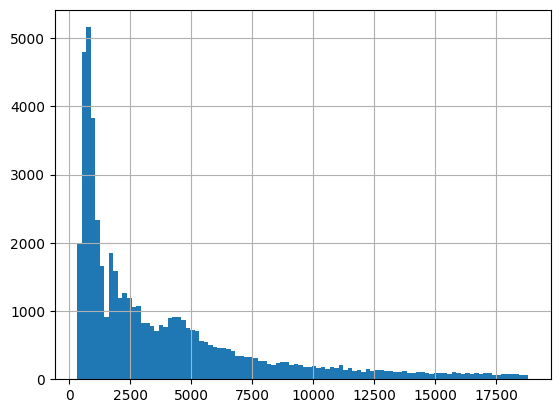

In [163]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid()

# Подготовка данных

In [164]:
features = ['carat', 'cut', 'color',
            'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [165]:
cut_transform = {'Fair': 0, 'Good': 1,
                 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2,
                     'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [166]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(
    lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(
    lambda x: clarity_transform.get(x))

In [167]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=47, test_size=0.3)

In [169]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [170]:
reg = LinearRegression().fit(X_train, y_train)

In [171]:
y_pred = reg.predict(X_test)

In [172]:
score = mean_squared_error(y_pred, y_test)
score

1477039.708379342

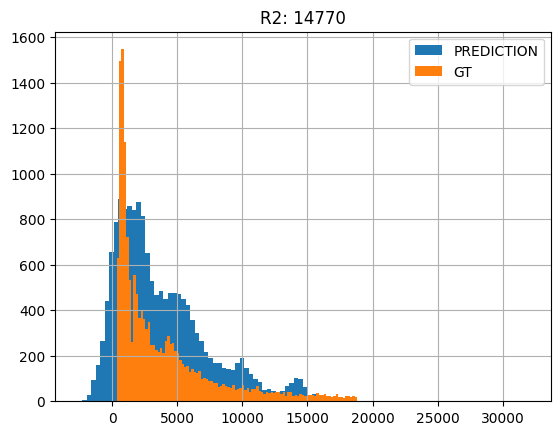

In [173]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [174]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, n_features, learning_rate=0.01, n_iter=1000, epoch_no_improve=3, min_delta=1e-2):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_seed = 42
        self.epoch_no_improve = epoch_no_improve
        self.min_delta = min_delta

        np.random.seed(self.random_seed)

        self.b = float(np.random.randn())
        self.W = np.random.randn(n_features)

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        y = y.ravel()
        n = X.shape[0]
        best_loss = np.inf
        no_improve = 0

        for _ in range(self.n_iter):

            pred = X @ self.W + self.b
            error = pred - y
            mse = np.mean(error ** 2)

            if mse < best_loss - self.min_delta:
                best_loss = mse
                no_improve = 0
                best_W, best_b = self.W.copy(), self.b
            else:
                no_improve += 1
                if no_improve >= self.epoch_no_improve:
                    self.W, self.b = best_W, best_b
                    print(
                        f'Ранний останов, нет улучшений!\nЛучший лосс (MSE): {best_loss}')
                    break

            self.W -= 2 * self.learning_rate * (X.T @ error) / n
            self.b -= 2 * self.learning_rate * error.mean()

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """

        return X @ self.W + self.b

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """

        print(f'Веса модели (W): {self.W}\nСмещение модели (b): {self.b}')

        return self.W, self.b

In [175]:
model_reg = LinearRegressorGD(X_train.shape[1])
model_reg.fit(X_train, y_train)

y_pred = model_reg.predict(X_test)
score = mean_squared_error(y_pred, y_test)
print(f'MSE: {score}')

model_reg.get_params()

MSE: 8546380.898629302
Веса модели (W): [5639.10797369 -418.46314565 1138.654694   -967.84647955   16.67047567
  338.60934603 5735.43823392 1042.98797742 1185.11219333]
Смещение модели (b): 161.56907139406695


(array([5639.10797369, -418.46314565, 1138.654694  , -967.84647955,
          16.67047567,  338.60934603, 5735.43823392, 1042.98797742,
        1185.11219333]),
 np.float64(161.56907139406695))

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [176]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, input_dim, hidden_layer_sizes=(100, 10), learning_rate=0.01, n_iter=50, seed=42):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = tuple(hidden_layer_sizes)
        self.learning_rate = float(learning_rate)
        self.n_iter = int(n_iter)
        self.rng = np.random.default_rng(seed)

        layer_sizes = (input_dim,) + self.hidden_layer_sizes + (1,)

        self.W = []
        self.b = []
        for input, out in zip(layer_sizes[:-1], layer_sizes[1:]):
            scale = np.sqrt(1.0 / input)
            self.W.append(self.rng.normal(0.0, scale, size=(input, out)))
            self.b.append(np.zeros(out, dtype=np.float64))

    def sigmoid(self, X):

        return 1 / (1 + np.exp(-X))

    def sigmoid_derivative(self, X):
        return X * (1 - X)

    def loss(self, y_pred, y):

        return np.mean((y_pred - y) ** 2)

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """

        A = X
        pre_acts = []
        acts = [A]
        L = len(self.W)

        for l in range(L - 1):

            Z = A @ self.W[l] + self.b[l]
            A = self.sigmoid(Z)
            pre_acts.append(Z)
            acts.append(A)

        Z = A @ self.W[-1] + self.b[-1]
        y_pred = Z
        pre_acts.append(Z)
        acts.append(y_pred)
        cache = (pre_acts, acts)

        return y_pred, cache

    def backward(self, X, y, y_pred, cache):
        """
        Реализация backward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): вектор таргетов размера (n_samples, )
            y_pred (np.ndarray): вектор предсказанных таргетов  размера (n_samples, )
            cache (tuple[list[np.ndarray], list[np.ndarray]]): Промежуточные значения для бэкпропа (pre_acts, acts)

        Возвращает:
            np.ndarray: Градиенты по весам
        """
        _, acts = cache
        L = len(self.W)
        n = X.shape[0]

        gW = [None] * L
        gb = [None] * L

        delta = (2.0 / n) * (y_pred - y)

        A_prev = acts[-2]
        gW[L - 1] = A_prev.T @ delta
        gb[L - 1] = delta.sum(axis=0)

        for l in range(L - 2, -1, -1):
            A_l = acts[l + 1]
            delta = (delta @ self.W[l + 1].T) * self.sigmoid_derivative(A_l)

            A_prev = acts[l]
            gW[l] = A_prev.T @ delta
            gb[l] = delta.sum(axis=0)

        return gW, gb

    def step(self, gW, gb):
        for l in range(len(self.W)):
            self.W[l] -= self.learning_rate * gW[l]
            self.b[l] -= self.learning_rate * gb[l]

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """

        for epoch in range(self.n_iter):
            y_pred, cache = self.forward(X)
            if (epoch + 1) % 5 == 0:
                print(f'Epoch {epoch+1}: MSE={self.loss(y_pred, y):.6f}')
            gW, gb = self.backward(X, y, y_pred, cache)
            self.step(gW, gb)
        return self

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """

        y_pred, _ = self.forward(X)
        return y_pred

In [177]:
MLP = MLPRegressor(X_train.shape[1])
MLP.fit(X_train, y_train)

y_pred = MLP.predict(X_test)
score = mean_squared_error(y_pred, y_test)
print(f'Метрика MSE: {score}')

Epoch 5: MSE=21380658.453738
Epoch 10: MSE=17131120.512782
Epoch 15: MSE=16190691.056904
Epoch 20: MSE=15982572.533485
Epoch 25: MSE=15936515.575657
Epoch 30: MSE=15926323.098171
Epoch 35: MSE=15924067.486810
Epoch 40: MSE=15923568.316455
Epoch 45: MSE=15923457.849267
Epoch 50: MSE=15923433.402704
Метрика MSE: 15897204.703982241
